# Bibliotecas e *drives*

In [0]:
import pandas as pd
import numpy as np
import io
import requests
import matplotlib.pyplot as plt
from datetime import date, timedelta
%matplotlib inline

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics.regression import r2_score
import scipy

*acessando minha pasta do Gdrive onde estão as informações que preciso*

In [0]:
#from google.colab import drive # Essa célula monta o drive, vai exigir autenticação para ler e manipular os arquivos
#drive.mount('/content/gdrive') # autenticação, copiar a chave de acesso que será disponibilizada

### optei por não usar, pois o google disponibilizou uma função para isso

In [0]:
#acessando a pasta
%cd /content/drive/My\ Drive/Colab\ Notebooks/covid19

/content/drive/My Drive/Colab Notebooks/covid19


In [0]:
!ls #verificando o conteudo da pasta

 API_SP.POP.TOTL_DS2_en_csv_v2_887275.csv
 brasil_20200324.csv
 brasil_20200326.csv
 Brasil_20200327.html
 Brasil_covid19.html
 casos.png
 covid19Brazil-script.ipynb
 covid19-script.ipynb
 covid19-SEIR.ipynb
'Documento sem título.gdoc'
 full_data_20200320.csv
 full_data_20200321.csv
 full_data_20200322.csv
 full_data_20200323.csv
 full_data_20200326.csv
 Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_887275.csv
 Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_887275.csv
 mortes.png
 novos_casos.png
 teste.png


# Carregando o banco de dados

In [0]:
url='https://covid.ourworldindata.org/data/ecdc/full_data.csv'
data = requests.get(url).content
full_df = pd.read_csv(io.StringIO(data.decode('utf-8')))

#pop_df = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_887275.csv', error_bad_lines=False)

full_df.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2019-12-31,Afghanistan,0,0,0,0
1,2020-01-01,Afghanistan,0,0,0,0
2,2020-01-02,Afghanistan,0,0,0,0
3,2020-01-03,Afghanistan,0,0,0,0
4,2020-01-04,Afghanistan,0,0,0,0


In [0]:
brazil_df = full_df[full_df['location']=='Brazil']
china_df = full_df[full_df['location']=='China']
italy_df = full_df[full_df['location']=='Italy']
iran_df = full_df[full_df['location']=='Iran']
spain_df = full_df[full_df['location'] == 'Spain']
canada_df = full_df[full_df['location'] == 'Canada']
usa_df = full_df[full_df['location']=='United States']
uk_df = full_df[full_df['location']=='United Kingdom']
france_df = full_df[full_df['location'] == 'France']

In [0]:
usa_df.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths
8582,2019-12-31,United States,0,0,0,0
8583,2020-01-01,United States,0,0,0,0
8584,2020-01-02,United States,0,0,0,0
8585,2020-01-03,United States,0,0,0,0
8586,2020-01-04,United States,0,0,0,0


In [0]:
brazil_df = brazil_df[brazil_df['total_cases'] != 0].reset_index()
china_df = china_df[china_df['total_cases'] != 0].reset_index()
italy_df = italy_df[italy_df['total_cases'] != 0].reset_index()
usa_df = usa_df[usa_df['total_cases'] != 0].reset_index()
iran_df = iran_df[iran_df['total_cases'] != 0].reset_index()
spain_df = spain_df[spain_df['total_cases'] != 0].reset_index()
canada_df = canada_df[canada_df['total_cases'] != 0].reset_index()
uk_df = uk_df[uk_df['total_cases'] != 0].reset_index()
france_df = france_df[france_df['total_cases'] != 0].reset_index()

In [0]:
usa_df.total_cases.max()

312237

In [0]:
pop_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
Aruba,ABW,Population,total,SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,NaN,NaN
Afghanistan,AFG,Population,total,SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,10893776.0,11173642.0,11475445.0,11791215.0,12108963.0,12412950.0,12689160.0,12943093.0,13171306.0,13341198.0,13411056.0,13356511.0,13171673.0,12882528.0,12537730.0,12204292.0,11938208.0,11736179.0,11604534.0,11618005.0,11868877.0,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,20170844.0,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,NaN,NaN
Angola,AGO,Population,total,SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,5771652.0,5803254.0,5890365.0,6040777.0,6248552.0,6496962.0,6761380.0,7024000.0,7279509.0,7533735.0,7790707.0,8058067.0,8341289.0,8640446.0,8952950.0,9278096.0,9614754.0,9961997.0,10320111.0,10689250.0,11068050.0,11454777.0,11848386.0,12248901.0,12657366.0,13075049.0,13503747.0,13945206.0,14400719.0,14871570.0,15359601.0,15866869.0,16395473.0,16945753.0,17519417.0,18121479.0,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,NaN,NaN
Albania,ALB,Population,total,SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,2135479.0,2187853.0,2243126.0,2296752.0,2350124.0,2404831.0,2458526.0,2513546.0,2566266.0,2617832.0,2671997.0,2726056.0,2784278.0,2843960.0,2904429.0,2964762.0,3022635.0,3083605.0,3142336.0,3227943.0,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,3108778.0,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,NaN,NaN
Andorra,AND,Population,total,SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,23058.0,24276.0,25559.0,26892.0,28232.0,29520.0,30705.0,31777.0,32771.0,33737.0,34818.0,36067.0,37500.0,39114.0,40867.0,42706.0,44600.0,46517.0,48455.0,50434.0,52448.0,54509.0,56671.0,58888.0,60971.0,62677.0,63850.0,64360.0,64327.0,64142.0,64370.0,65390.0,67341.0,70049.0,73182.0,76244.0,78867.0,80993.0,82684.0,83862.0,84463.0,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,NaN,NaN


# Plotando

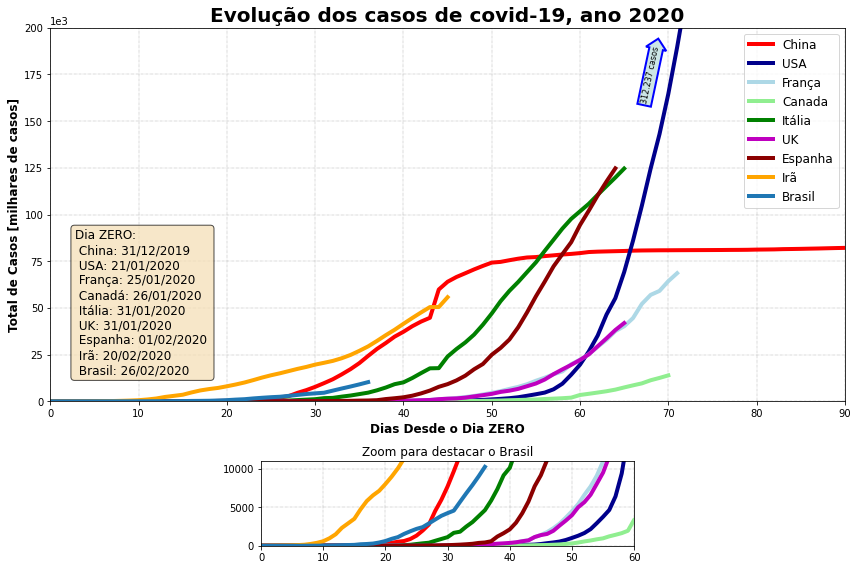

In [0]:
fig = plt.figure(figsize=(12,8))

#plotando o principal
ax1 = plt.subplot2grid((4,4), (0,0), colspan=4, rowspan=3)
ax1.axis([0, 90, -1, 200000])
ax1.plot(china_df.index, china_df['total_cases'], linewidth=4, color='red', 
         label='China')
ax1.plot(usa_df.index, usa_df['total_cases'], linewidth=4, color='darkblue', 
         label='USA')
ax1.plot(france_df.index, france_df['total_cases'], linewidth=4, 
         color='lightblue', label='França')
ax1.plot(canada_df.index, canada_df['total_cases'], linewidth=4, 
         color='lightgreen', label='Canada')
ax1.plot(italy_df.index, italy_df['total_cases'], linewidth=4, color='green', 
         label='Itália')
ax1.plot(uk_df.index, uk_df['total_cases'], linewidth=4, color='m', 
         label='UK')
ax1.plot(spain_df.index, spain_df['total_cases'], linewidth=4, color='darkred', 
         label='Espanha')
ax1.plot(iran_df.index, iran_df['total_cases'], linewidth=4, color='orange', 
         label='Irã')
ax1.plot(brazil_df.index, brazil_df['total_cases'], linewidth=4, label='Brasil')
ax1.grid(ls='-.', lw=0.45)
ax1.legend(fontsize=12, loc='upper right')
ax1.set_title('Evolução dos casos de covid-19, ano 2020', fontsize=20, 
              weight='bold')
ax1.set_xlabel('Dias Desde o Dia ZERO', weight='bold', fontsize=12)
ax1.set_ylabel('Total de Casos [milhares de casos]', weight='bold', fontsize=12)
ax1.ticklabel_format(axis='y', style='sci', scilimits=(3,3))

#zoom para destacar o Brasil
ax2 = plt.subplot2grid((4,4), (3,1), colspan=2, rowspan=1)
ax2.axis([0, 60, -1, 11000])
ax2.plot(china_df.index, china_df['total_cases'], linewidth=4, color='red', 
         label='China')
ax2.plot(usa_df.index, usa_df['total_cases'], linewidth=4, color='darkblue', 
         label='USA')
ax2.plot(france_df.index, france_df['total_cases'], linewidth=4, 
         color='lightblue', label='França')
ax2.plot(canada_df.index, canada_df['total_cases'], linewidth=4, 
         color='lightgreen', label='Canada')
ax2.plot(italy_df.index, italy_df['total_cases'], linewidth=4, color='green', 
         label='Itália')
ax2.plot(uk_df.index, uk_df['total_cases'], linewidth=4, color='m', 
         label='UK')
ax2.plot(spain_df.index, spain_df['total_cases'], linewidth=4, color='darkred', 
         label='Espanha')
ax2.plot(iran_df.index, iran_df['total_cases'], linewidth=4, color='orange', 
         label='Irã')
ax2.plot(brazil_df.index, brazil_df['total_cases'], linewidth=4, label='Brasil')
ax2.grid(ls='-.', lw=0.45)
ax2.set_title('Zoom para destacar o Brasil')

fig.tight_layout(pad=1.0)

#visao artistica
ax = plt.gca()
text_box = 'Dia ZERO: \n China: 31/12/2019 \n USA: 21/01/2020 '\
           '\n França: 25/01/2020 \n Canadá: 26/01/2020 \n Itália: 31/01/2020'\
           '\n UK: 31/01/2020 \n Espanha: 01/02/2020 \n Irã: 20/02/2020'\
           '\n Brasil: 26/02/2020'
prop = dict(boxstyle='round', facecolor='wheat', alpha=0.7)
ax.text(-0.5, 2.0, text_box, transform=ax.transAxes, fontsize=12,
        verticalalignment='bottom', bbox=prop)

props_usa = dict(boxstyle="rarrow", fc=(0.8, 0.9, 0.9), ec="b", lw=2)
text_usa = ax1.text(68, 175000, '312.237 casos', ha="center", va="center", rotation=78,
            size=8, bbox=props_usa)


#plt.show()
fig.savefig("casos.png", bbox_inches='tight', dpi=600)

### Treinando o Modelo

polinomial de ordens 1 até 9

In [0]:
model = LinearRegression()
orders = np.arange(0,10)
r2_train = np.zeros(10)
r2_test = np.zeros(10)

#X = china_df.index
#y = china_df['total_cases']
X = brazil_df.index
y = brazil_df['total_cases']
#X = usa_df.index
#y = usa_df['total_cases']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_tr = X_train.values.reshape(-1,1)
X_ts = X_test.values.reshape(-1,1)

for i in range(len(orders)):
  poly = PolynomialFeatures(degree=orders[i])

  X_tr_poly = poly.fit_transform(X_tr)
  X_ts_poly = poly.fit_transform(X_ts)
  
  model.fit(X_tr_poly, y_train)

  r2_train[i] = r2_score(y_train, model.predict(X_tr_poly))
  r2_test[i] = r2_score(y_test, model.predict(X_ts_poly))
  if i>0:
    if r2_train[i] > r2_train[i-1]:
      max_r2_train = r2_train[i]
      i_r2_train = i
    if r2_test[i] > r2_test[i-1]:
      max_r2_test = r2_test[i]
      i_r2_test = i

print(i_r2_train, max_r2_train, i_r2_test, max_r2_test)


9 0.9996664723918851 9 0.9934671831619953


exponencial

In [0]:
#X = brazil_df.index
#y = brazil_df['total_cases']
X = brazil_df.index
y = brazil_df['total_deaths'].dropna()

#np.polyfit(X, np.log(y), 1)
scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t),  X,  y, p0=(0.28, 0.14))


(array([0.29791361, 0.20272104]), array([[ 9.32023104e-04, -9.15422626e-05],
        [-9.15422626e-05,  9.03784735e-06]]))

-> y = exp(n2)*exp(n1.x)

#### Plotando

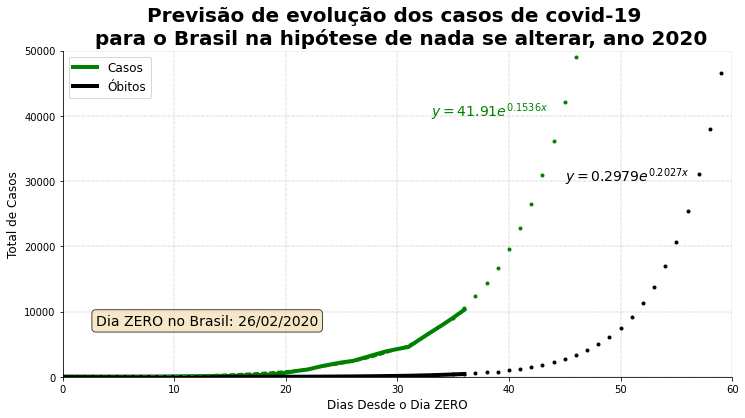

In [115]:
plt.figure(figsize=(12,6))

plt.plot(brazil_df.index, brazil_df['total_cases'], linewidth=4, color='green', label='Casos')
plt.plot(brazil_df.index, brazil_df['total_deaths'], linewidth=4, color='black', label='Óbitos')

#fazendo a previsao conforme o modelo de acao do Brasil
def plot_model(local, A, B, cor):
  X = local.index
  y = A*np.exp(B*X)  
  plt.plot(local.index, y, '--', color=cor)
  for i in np.arange(35, 180):
    y1 = A*np.exp(B*i)
    plt.plot(i, y1, '.' ,color=cor)

plot_model(brazil_df, 41.91073592, 0.15360811, 'green')
plot_model(brazil_df, 0.29791361, 0.20272104, 'black')


#formatando o grafico
plt.legend(fontsize=12)
plt.title('Previsão de evolução dos casos de covid-19 \n para o Brasil na '\
          'hipótese de nada se alterar, ano 2020', fontsize=20, weight='bold')
plt.ylabel('Total de Casos', fontsize=12)
plt.xlabel('Dias Desde o Dia ZERO', fontsize=12)
plt.xticks(fontsize=10)

#visao artistica
ax = plt.gca()
ax.axis([0, 60, -1,50000])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(ls='-.', lw=0.45)

text_box = 'Dia ZERO no Brasil: 26/02/2020'
prop = dict(boxstyle='round', facecolor='wheat', alpha=0.7)
ax.text(0.05, 0.15, text_box, transform=ax.transAxes, fontsize=14,
        verticalalignment='bottom', bbox=prop)
ax.text(33, 40000, '$y=41.91 e^{0.1536 x}$', color='green', fontsize=14)
ax.text(45, 30000, '$y=0.2979 e^{0.2027 x}$', color='black', fontsize=14)

#plt.show()
fig.savefig("obitos-estimativa.png", bbox_inches='tight', dpi=600)

## Verificando o número de *mortes*


*usando um gráfico*

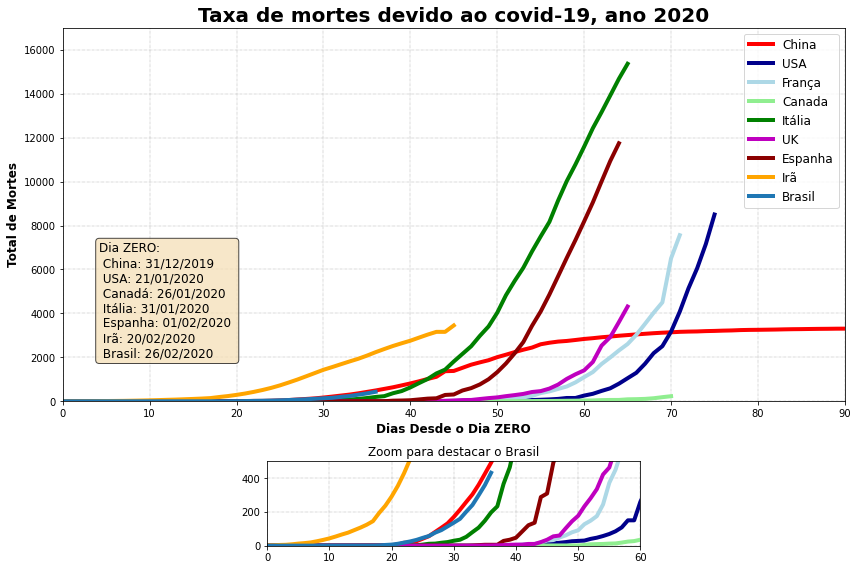

In [127]:
fig = plt.figure(figsize=(12,8))

#plotando o principal
ax1 = plt.subplot2grid((4,4), (0,0), colspan=4, rowspan=3)
ax1.axis([0, 90, -1, 17000])
ax1.plot(china_df.index, china_df['total_deaths'], linewidth=4, color='red', 
         label='China')
ax1.plot(usa_df.index, usa_df['total_deaths'], linewidth=4, color='darkblue', 
         label='USA')
ax1.plot(france_df.index, france_df['total_deaths'], linewidth=4, 
         color='lightblue', label='França')
ax1.plot(canada_df.index, canada_df['total_deaths'], linewidth=4, 
         color='lightgreen', label='Canada')
ax1.plot(italy_df.index, italy_df['total_deaths'], linewidth=4, color='green', 
         label='Itália')
ax1.plot(uk_df.index, uk_df['total_deaths'], linewidth=4, color='m', 
         label='UK')
ax1.plot(spain_df.index, spain_df['total_deaths'], linewidth=4, color='darkred', 
         label='Espanha')
ax1.plot(iran_df.index, iran_df['total_deaths'], linewidth=4, color='orange', 
         label='Irã')
ax1.plot(brazil_df.index, brazil_df['total_deaths'], linewidth=4, label='Brasil')
ax1.grid(ls='-.', lw=0.45)
ax1.legend(fontsize=12, loc='upper right')
ax1.set_title('Taxa de mortes devido ao covid-19, ano 2020', fontsize=20, 
              weight='bold')
ax1.set_xlabel('Dias Desde o Dia ZERO', weight='bold', fontsize=12)
ax1.set_ylabel('Total de Mortes', weight='bold', fontsize=12)

#zoom para destacar o Brasil
ax2 = plt.subplot2grid((4,4), (3,1), colspan=2, rowspan=1)
ax2.axis([0, 60, -1, 500])
ax2.plot(china_df.index, china_df['total_deaths'], linewidth=4, color='red', 
         label='China')
ax2.plot(usa_df.index, usa_df['total_deaths'], linewidth=4, color='darkblue', 
         label='USA')
ax2.plot(france_df.index, france_df['total_deaths'], linewidth=4, 
         color='lightblue', label='França')
ax2.plot(canada_df.index, canada_df['total_deaths'], linewidth=4, 
         color='lightgreen', label='Canada')
ax2.plot(italy_df.index, italy_df['total_deaths'], linewidth=4, color='green', 
         label='Itália')
ax2.plot(spain_df.index, spain_df['total_deaths'], linewidth=4, color='darkred', 
         label='Espanha')
ax2.plot(uk_df.index, uk_df['total_deaths'], linewidth=4, color='m', 
         label='UK')
ax2.plot(iran_df.index, iran_df['total_deaths'], linewidth=4, color='orange', 
         label='Irã')
ax2.plot(brazil_df.index, brazil_df['total_deaths'], linewidth=4, label='Brasil')
ax2.grid(ls='-.', lw=0.45)
ax2.set_title('Zoom para destacar o Brasil')

fig.tight_layout(pad=1.0)

#visao artistica
ax = plt.gca()
text_box = 'Dia ZERO: \n China: 31/12/2019 \n USA: 21/01/2020'\
           '\n Canadá: 26/01/2020 \n Itália: 31/01/2020 \n Espanha: 01/02/2020'\
           ' \n Irã: 20/02/2020 \n Brasil: 26/02/2020'
prop = dict(boxstyle='round', facecolor='wheat', alpha=0.7)
ax.text(-0.45, 2.2, text_box, transform=ax.transAxes, fontsize=12,
        verticalalignment='bottom', bbox=prop)


#plt.show()
fig.savefig("mortes.png", bbox_inches='tight', dpi=600)

## Novos Casos

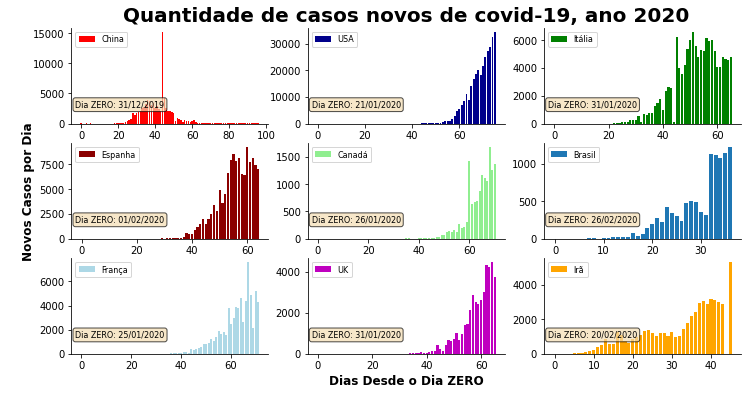

In [128]:
fig = plt.figure(figsize=(12,6))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.7)

# CHINA
ax = fig.add_subplot(331)
ax.bar(china_df.index, china_df['new_cases'], width=0.8, color='red', label='China')
ax.legend(fontsize=8, loc=2)
ax.text(0.02, 0.15, 'Dia ZERO: 31/12/2019', transform=ax.transAxes, fontsize=8,
        verticalalignment='bottom', bbox=props)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# USA
ax = fig.add_subplot(332)
ax.bar(usa_df.index, usa_df['new_cases'], width=0.8, color='darkblue', 
        label='USA')
ax.legend(fontsize=8, loc=2)
ax.text(0.02, 0.15, 'Dia ZERO: 21/01/2020', transform=ax.transAxes, fontsize=8,
        verticalalignment='bottom', bbox=props)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Quantidade de casos novos de covid-19, ano 2020', fontsize=20, 
             weight='bold')

#ITÁLIA
ax = fig.add_subplot(333)
ax.bar(italy_df.index, italy_df['new_cases'], width=0.8, color='green', 
       label='Itália')
ax.legend(fontsize=8, loc=2)
ax.text(0.02, 0.15, 'Dia ZERO: 31/01/2020', transform=ax.transAxes, fontsize=8,
        verticalalignment='bottom', bbox=props)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#ESPANHA
ax = fig.add_subplot(334)
ax.bar(spain_df.index, spain_df['new_cases'], width=0.8, color='darkred', 
        label='Espanha')
ax.legend(fontsize=8, loc=2)
ax.text(0.02, 0.15, 'Dia ZERO: 01/02/2020', transform=ax.transAxes, fontsize=8,
        verticalalignment='bottom', bbox=props)
ax.set_ylabel('\nNovos Casos por Dia', weight='bold', fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#CANADÁ
ax = fig.add_subplot(335)
#ax.bar(iran_df.index, iran_df['new_cases'], width=0.8, color='orange', 
#       label='Irã')
ax.bar(canada_df.index, canada_df['new_cases'], width=0.8, color='lightgreen', 
       label='Canadá')
ax.legend(fontsize=8, loc=2)
#ax.text(0.02, 0.15, 'Dia ZERO: 20/02/2020', transform=ax.transAxes, fontsize=8,
#        verticalalignment='bottom', bbox=props)
ax.text(0.02, 0.15, 'Dia ZERO: 26/01/2020', transform=ax.transAxes, fontsize=8,
        verticalalignment='bottom', bbox=props)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#BRASIL
ax = fig.add_subplot(336)
ax.bar(brazil_df.index, brazil_df['new_cases'], width=0.8, label='Brasil')
ax.legend(fontsize=8, loc=2)
ax.text(0.02, 0.15, 'Dia ZERO: 26/02/2020', transform=ax.transAxes, fontsize=8,
        verticalalignment='bottom', bbox=props)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#FRANÇA
ax = fig.add_subplot(337)
ax.bar(france_df.index, france_df['new_cases'], width=0.8, color='lightblue',
       label='França')
ax.legend(fontsize=8, loc=2)
ax.text(0.02, 0.15, 'Dia ZERO: 25/01/2020', transform=ax.transAxes, fontsize=8,
        verticalalignment='bottom', bbox=props)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#REINO UNIDO
ax = fig.add_subplot(338)
ax.bar(uk_df.index, uk_df['new_cases'], width=0.8, color='m',
       label='UK')
ax.legend(fontsize=8, loc=2)
ax.text(0.02, 0.15, 'Dia ZERO: 31/01/2020', transform=ax.transAxes, fontsize=8,
        verticalalignment='bottom', bbox=props)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Dias Desde o Dia ZERO', weight='bold', fontsize=12)

#IRÃ
ax = fig.add_subplot(339)
ax.bar(iran_df.index, iran_df['new_cases'], width=0.8, color='orange',
       label='Irã')
ax.legend(fontsize=8, loc=2)
ax.text(0.02, 0.15, 'Dia ZERO: 20/02/2020', transform=ax.transAxes, fontsize=8,
        verticalalignment='bottom', bbox=props)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#plt.show()
fig.savefig("novos_casos.png", bbox_inches='tight', dpi=600)